In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data=pd.read_csv('/content/Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In the given data above column exports, health and imports are given in % so, we need to convert them back to normal values

In [ ]:
data['exports']= (data['exports']*data['gdpp'])/100
data['health']= (data['health']*data['gdpp'])/100
data['imports']= (data['imports']*data['gdpp'])/100

In [ ]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,115.000000,1.150000e+02,115.000000,1.150000e+02,115.000000,115.000000,115.000000,115.000000,115.000000
mean,41.295652,1.756794e+05,25831.810788,1.780257e+05,8967.921739,7.732774,68.868696,3.106348,4589.078261
std,32.919965,3.355963e+05,43398.513579,3.307965e+05,6801.939716,6.055452,7.126210,1.449727,4081.357405
min,4.500000,1.063997e+01,61.798184,6.432789e+00,609.000000,-0.812000,52.000000,1.250000,231.000000
25%,15.350000,4.057377e+03,686.576250,5.183257e+03,2870.000000,2.615000,63.400000,1.920000,1210.000000
50%,28.100000,4.683868e+04,6177.609100,5.372943e+04,7350.000000,6.570000,70.400000,2.610000,3310.000000
75%,63.150000,1.737093e+05,31869.616700,1.882992e+05,13750.000000,11.350000,74.550000,4.355000,6760.000000
max,119.000000,2.102523e+06,242217.240000,2.143857e+06,29600.000000,23.600000,80.400000,6.540000,16600.000000


In [ ]:
#checking for null values
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no null values

EDA

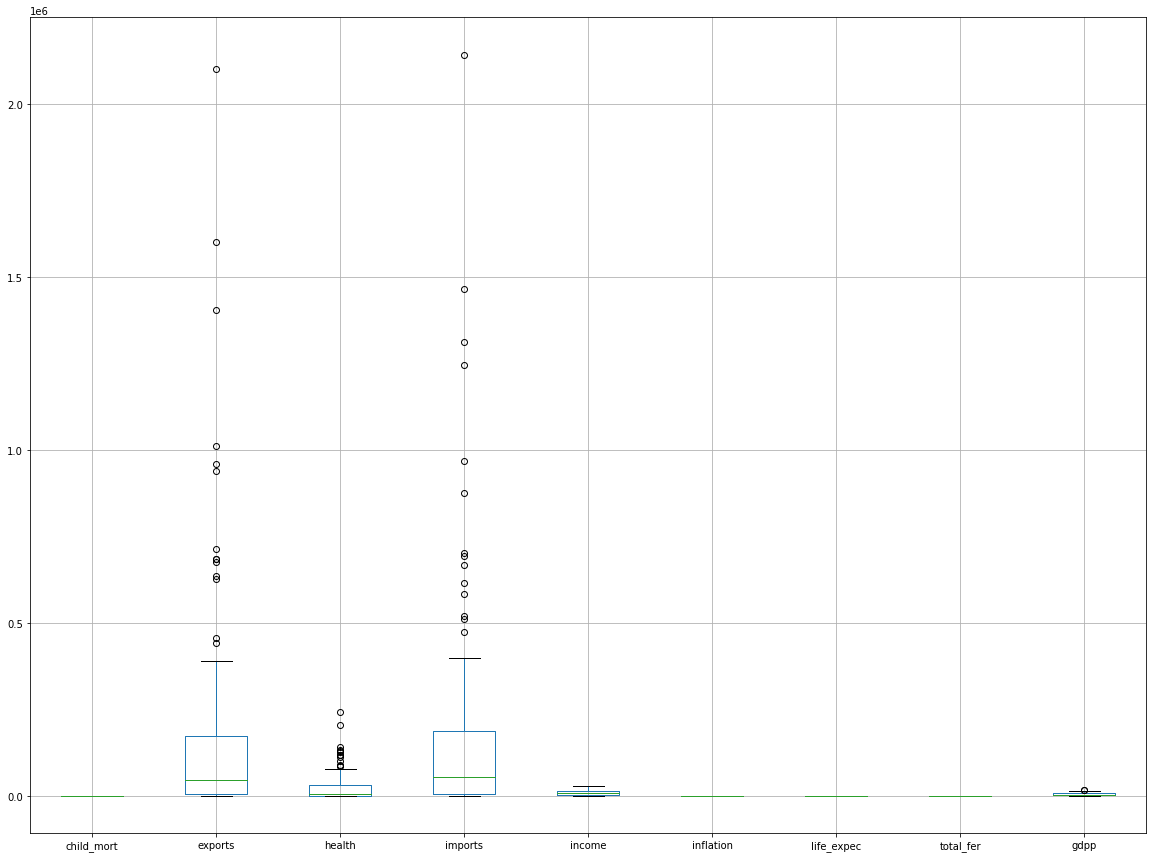

In [ ]:
#Univariate analysis
#checking for outliers

graph=data.select_dtypes(include=['int64','float64','int32'])
graph.boxplot(figsize=(20,15))
plt.show()


In [ ]:
#IQR calculation
Q1=data.quantile(.25)
Q3=data.quantile(.75)
IQR=Q3-Q1
print(((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).sum())


child_mort     0
country        0
exports       14
gdpp           2
health        13
imports       14
income         0
inflation      0
life_expec     0
total_fer      0
dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  """


There are outliers but we are ignoring since countries in need of help might be removed.

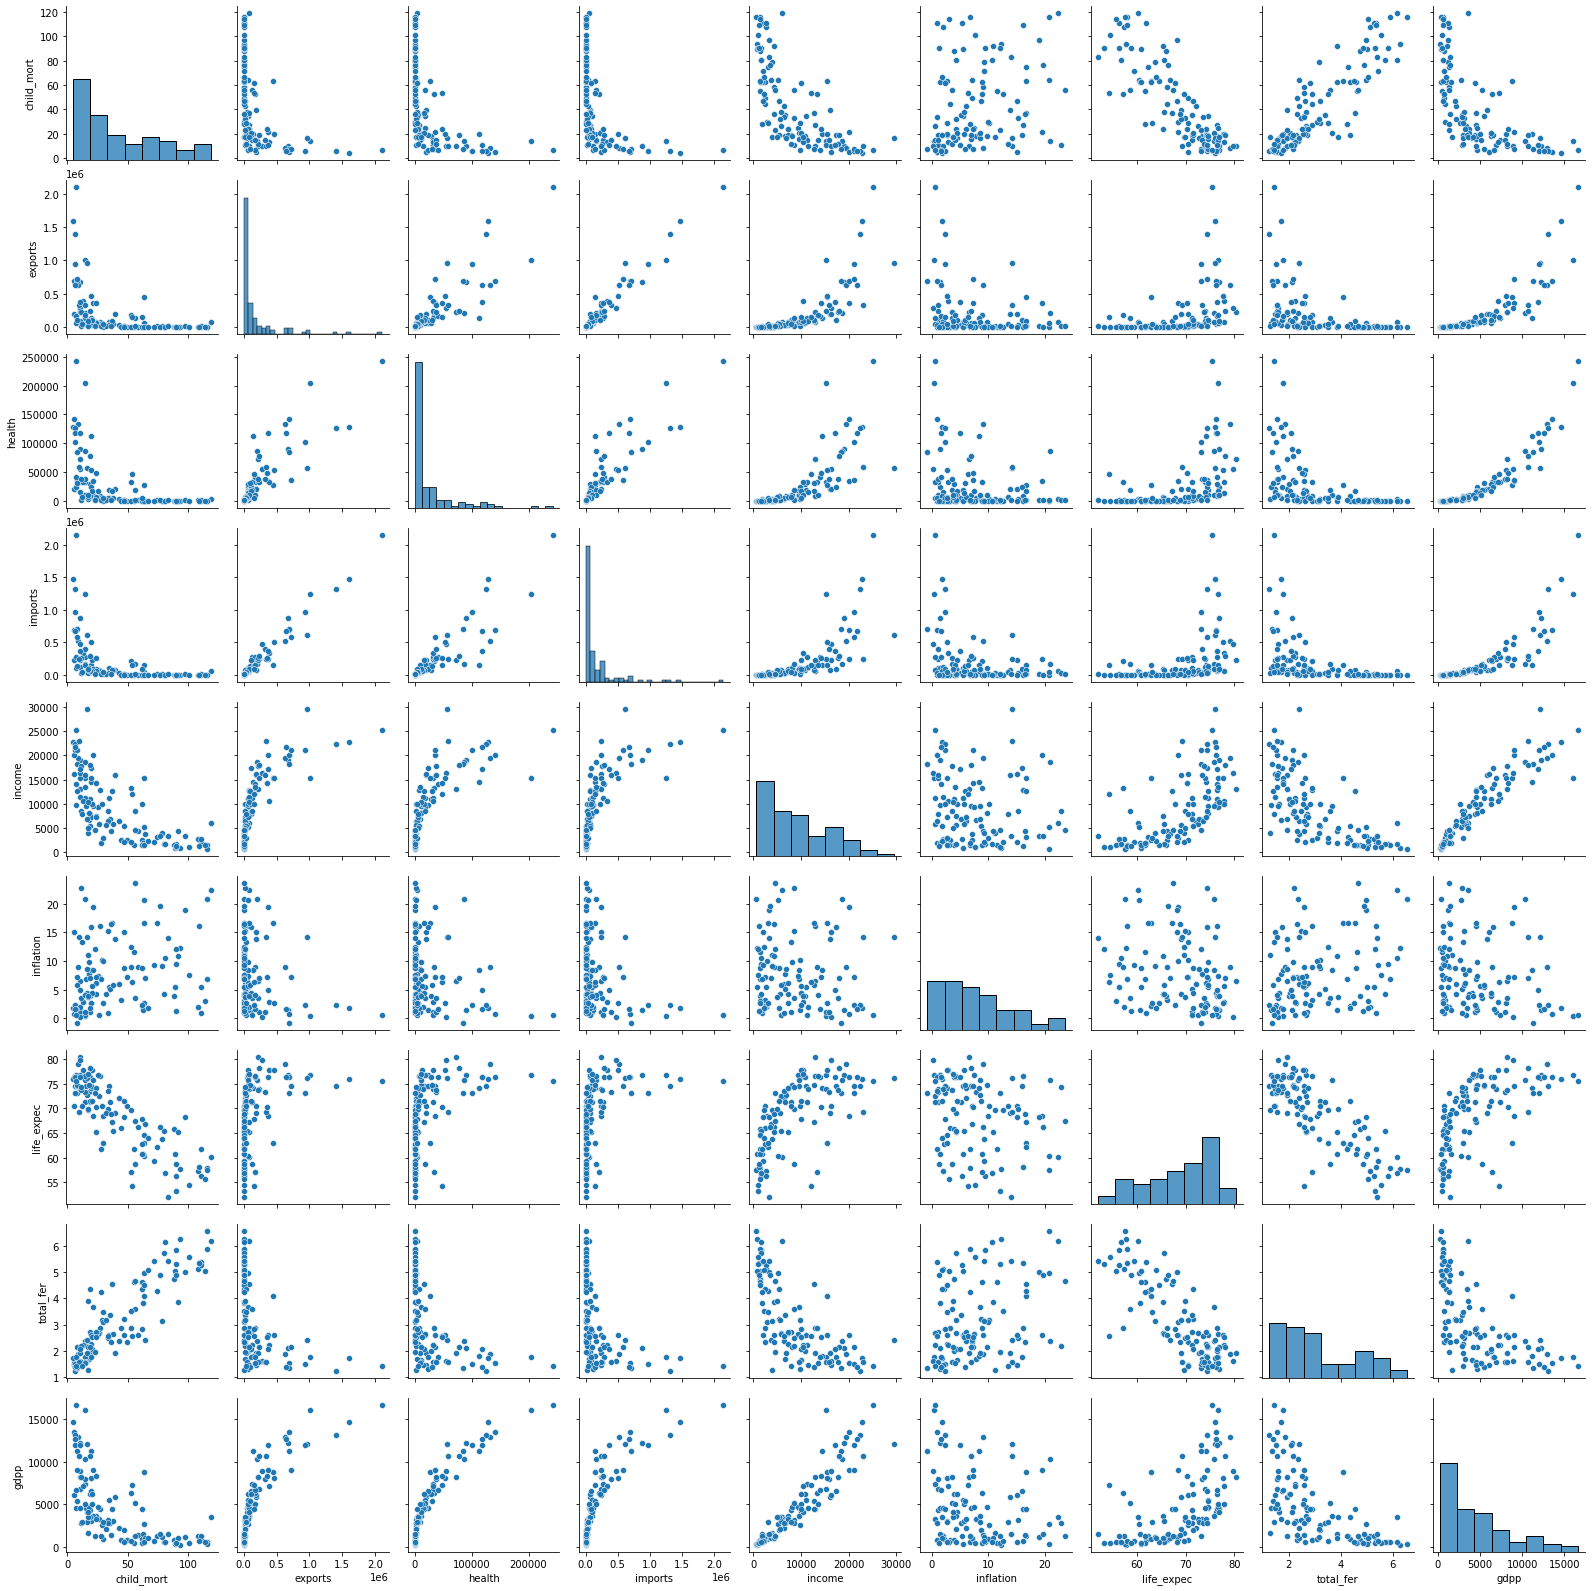

In [ ]:
#Bivariate analysis
import seaborn as sns
sns.pairplot(data)
plt.show()

In [ ]:
data.corr()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.426269,-0.486597,-0.453261,-0.701318,0.261430,-0.845969,0.886344,-0.655478
exports,-0.426269,1.000000,0.867753,0.978943,0.753802,-0.247876,0.389914,-0.418823,0.829181
health,-0.486597,0.867753,1.000000,0.894968,0.756716,-0.270254,0.469230,-0.485437,0.908045
imports,-0.453261,0.978943,0.894968,1.000000,0.724834,-0.324578,0.418526,-0.444993,0.830066
income,-0.701318,0.753802,0.756716,0.724834,1.000000,-0.123181,0.648076,-0.695250,0.936444
inflation,0.261430,-0.247876,-0.270254,-0.324578,-0.123181,1.000000,-0.234542,0.285523,-0.240890
life_expec,-0.845969,0.389914,0.469230,0.418526,0.648076,-0.234542,1.000000,-0.806592,0.605117
total_fer,0.886344,-0.418823,-0.485437,-0.444993,-0.695250,0.285523,-0.806592,1.000000,-0.638287
gdpp,-0.655478,0.829181,0.908045,0.830066,0.936444,-0.240890,0.605117,-0.638287,1.000000


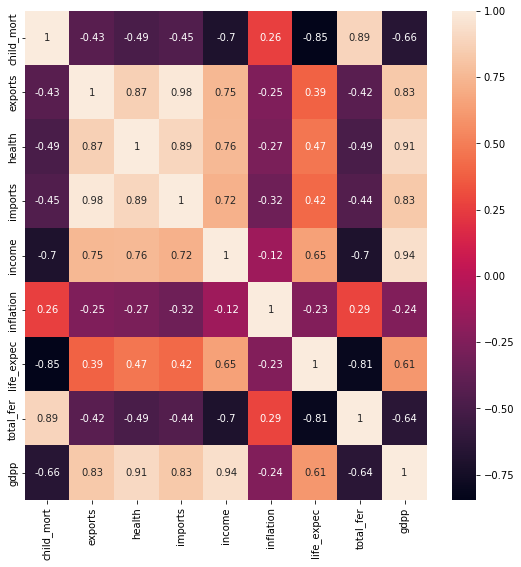

In [ ]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(),annot=True)
plt.show()

Here we can see a very high correlation between the columns but we can work with these correlations as clustering is not affected much by the correlations betweeen variables.

Scaling the data for clustering

In [31]:
from sklearn.preprocessing import StandardScaler
data1=data.drop('country',axis=1)
SS=StandardScaler()
data1=SS.fit_transform(data1)

1034.9999999999998
605.7569587638816
387.6288837429927
307.3247009678343
270.6080341041253
236.25392686892846
204.8967479788417
186.49376768453055
167.6266760730856
153.88800838892587


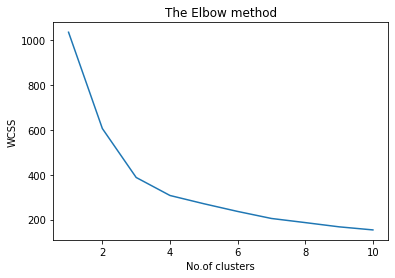

In [33]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
     kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
     kmeans.fit(data1)
     wcss.append(kmeans.inertia_)
     print(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow method')
plt.xlabel('No.of clusters')
plt.ylabel('WCSS')
plt.show()

In [38]:
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data1)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data1, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))


For n_clusters=2, the silhouette score is 0.39297111750364455
For n_clusters=3, the silhouette score is 0.36918105917619987
For n_clusters=4, the silhouette score is 0.35234290205923907
For n_clusters=5, the silhouette score is 0.2598251503608575
For n_clusters=6, the silhouette score is 0.2647847774713589
For n_clusters=7, the silhouette score is 0.2762077708574647
For n_clusters=8, the silhouette score is 0.2546967616168527


In [39]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data1)



In [42]:
kmeans = KMeans(n_clusters=3, max_iter=100 , random_state = 100)
kmeans.fit(data1)

KMeans(max_iter=100, n_clusters=3, random_state=100)

In [43]:
kmeans.labels_

array([0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1,
       0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 2,
       1, 0, 1, 0, 0], dtype=int32)

In [46]:
df_org1 = data.copy()

In [47]:
df_km1 = pd.concat([data, pd.Series(kmeans.labels_)], axis = 1)
df_km1.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_id']
df_km1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,305.809,231.803222,1373.08241,1610.0,9.44,56.2,5.82,553.0,0.0
1,Albania,16.6,46838.680,10956.905500,81298.56600,9930.0,4.49,76.3,1.65,4090.0,1.0
2,Algeria,27.3,76383.744,8294.797200,62459.62400,12900.0,16.10,76.5,2.89,4460.0,1.0
3,Angola,119.0,77631.407,3551.356500,53457.26100,5900.0,22.40,60.1,6.16,3530.0,0.0
4,Antigua and Barbuda,10.3,677222.000,89750.520000,876667.60000,19100.0,1.44,76.8,2.13,12200.0,2.0


In [48]:
df_km1['cluster_id'].value_counts()

1.0    62
0.0    40
2.0    13
Name: cluster_id, dtype: int64

KMeans cluster visualization

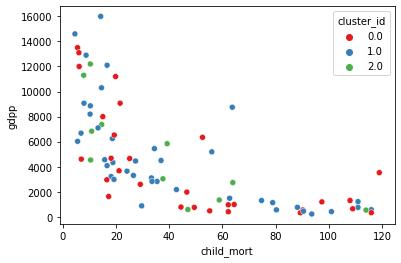

In [49]:
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km1, palette='Set1')
plt.show()

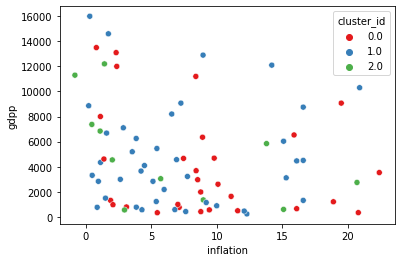

In [50]:
sns.scatterplot(x = 'inflation', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km1, palette='Set1')
plt.show()

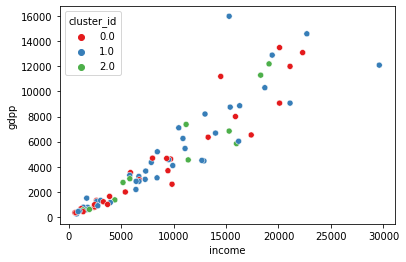

In [51]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km1, palette='Set1')
plt.show()

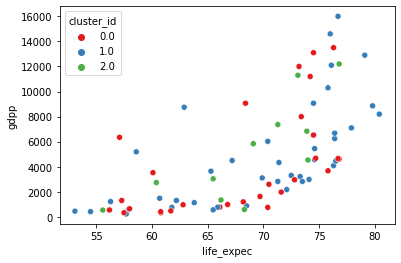

In [52]:
sns.scatterplot(x = 'life_expec', y = 'gdpp', hue ='cluster_id', legend = 'full', data = df_km1, palette='Set1')
plt.show()

Cluster profiling

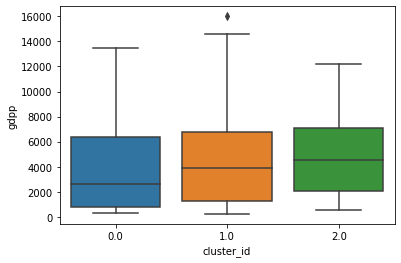

In [58]:
# profiling the clusters with the given variables mentioned in the problem statement
# income
sns.boxplot(data=df_km1,x = 'cluster_id',y='gdpp')
plt.show()

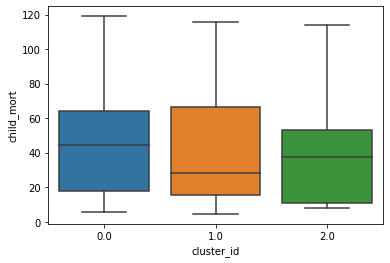

In [59]:
sns.boxplot(data=df_km1,x = 'cluster_id',y='child_mort')
plt.show()

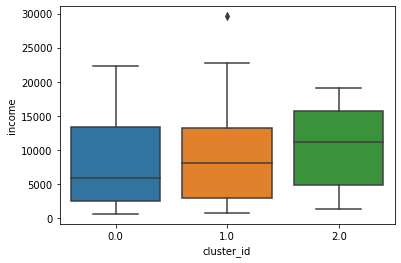

In [60]:
sns.boxplot(data=df_km1,x = 'cluster_id',y='income')
plt.show()

Here cluster_id 1 has the lowest income and hightest child mortality rate with a very a very low gdpp so, this will be our concerned cluster.

In [61]:
#Finding the observations that belong to cluster id 0
df_km1[df_km1['cluster_id']==1]['country']

1         Albania
2         Algeria
5       Argentina
6         Armenia
7             NaN
          ...    
105       Morocco
106    Mozambique
108       Namibia
110           NaN
112           NaN
Name: country, Length: 62, dtype: object

In [62]:
top_kmeans = df_km1[df_km1['cluster_id']==1].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True])
top_kmeans = top_kmeans.reset_index().drop('index',axis=1)
top_kmeans.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Burkina Faso,116.0,634.800000,222.841250,978.65000,1430.0,6.810,57.9,5.87,575.0,1.0
1,Benin,111.0,1367.462320,235.571240,2137.37808,1820.0,0.885,61.8,5.36,758.0,1.0
2,Cote d'Ivoire,111.0,7531.304000,788.852000,6444.77200,2690.0,5.390,56.3,5.27,1220.0,1.0
3,Mozambique,101.0,553.017150,91.467281,811.09182,918.0,7.640,54.5,5.56,419.0,1.0
4,Burundi,93.6,47.598012,61.898760,209.17512,764.0,12.300,57.7,6.26,231.0,1.0
5,Malawi,90.5,480.352680,138.838779,735.27669,1030.0,12.100,53.1,5.31,459.0,1.0
6,Comoros,88.2,975.745650,266.703811,3057.33637,1410.0,3.870,65.9,4.75,769.0,1.0
7,Gambia,80.3,751.708720,179.715236,1348.65388,1660.0,4.300,65.5,5.71,562.0,1.0
8,Lao,78.9,4600.584000,580.921200,6407.02800,3980.0,9.200,63.8,3.15,1140.0,1.0
9,Ghana,74.7,5062.495000,895.804200,7876.89900,3060.0,16.600,62.2,4.27,1310.0,1.0


In [64]:
top_10 = top_kmeans.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Burkina Faso
1,Benin
2,Cote d'Ivoire
3,Mozambique
4,Burundi
5,Malawi
6,Comoros
7,Gambia
8,Lao
9,Ghana


Heirarichal Clustering

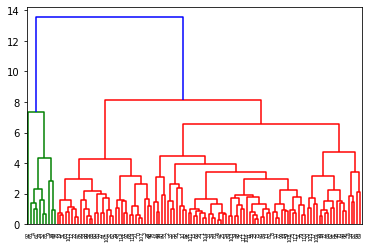

In [66]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
mergings_complete = linkage(data1, method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

In [67]:
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 1, 1, 0, 2, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1,
       0, 1, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0])

In [68]:
df_hm = pd.concat([data, pd.Series(cluster_labels)], axis = 1)
df_hm.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','cluster_labels']
df_hm.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Afghanistan,90.2,305.809,231.803222,1373.08241,1610.0,9.44,56.2,5.82,553.0,0.0
1,Albania,16.6,46838.680,10956.905500,81298.56600,9930.0,4.49,76.3,1.65,4090.0,1.0
2,Algeria,27.3,76383.744,8294.797200,62459.62400,12900.0,16.10,76.5,2.89,4460.0,1.0
3,Angola,119.0,77631.407,3551.356500,53457.26100,5900.0,22.40,60.1,6.16,3530.0,0.0
4,Antigua and Barbuda,10.3,677222.000,89750.520000,876667.60000,19100.0,1.44,76.8,2.13,12200.0,2.0


In [69]:
df_hm['cluster_labels'].value_counts()

1.0    72
0.0    33
2.0    10
Name: cluster_labels, dtype: int64

Heirarichal Clusters Visulaisation

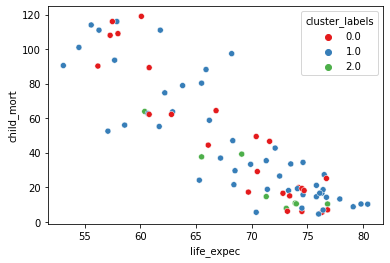

In [70]:
sns.scatterplot(x = 'life_expec', y = 'child_mort', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

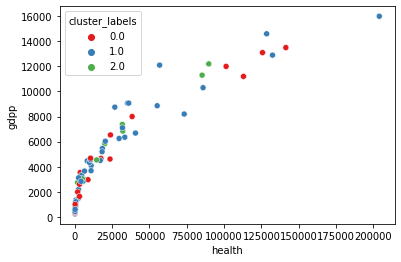

In [71]:
#health
sns.scatterplot(x = 'health', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

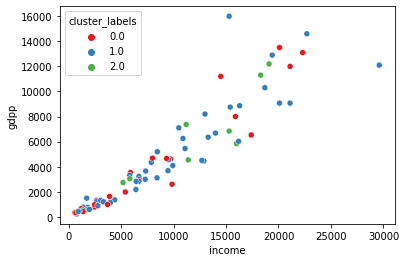

In [72]:
#income
sns.scatterplot(x = 'income', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

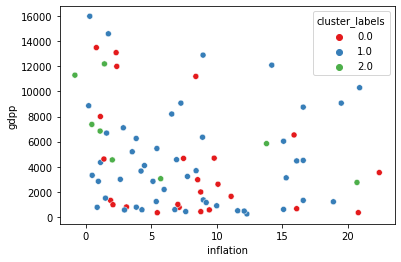

In [73]:
#inflation
sns.scatterplot(x = 'inflation', y = 'gdpp', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

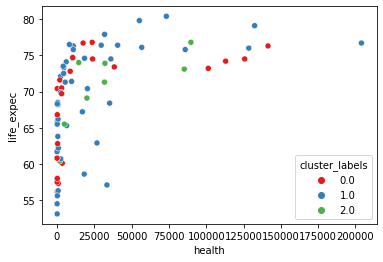

In [74]:
# health vs life_expec
sns.scatterplot(x = 'health', y = 'life_expec', hue ='cluster_labels', legend = 'full', data = df_hm, palette='Set1')
plt.show()

Cluster Profiling

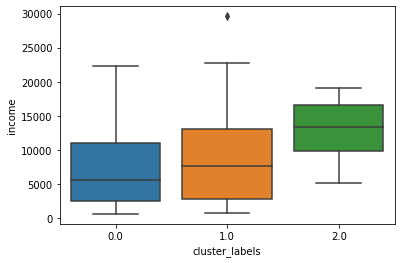

In [75]:
sns.boxplot(data=df_hm,x = 'cluster_labels',y='income')
plt.show()

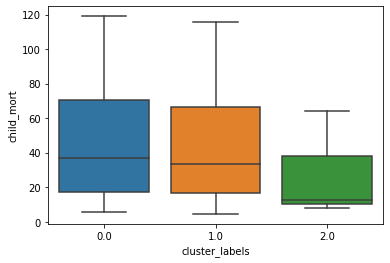

In [76]:
#child_mort
sns.boxplot(data=df_hm,x = 'cluster_labels',y='child_mort')
plt.show()

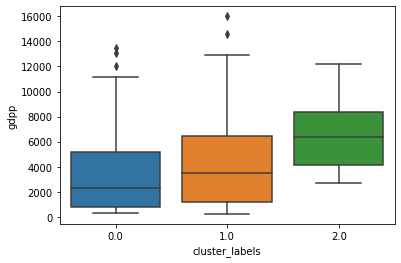

In [77]:
#gdpp
sns.boxplot(data=df_hm,x = 'cluster_labels',y='gdpp')
plt.show()

Here we can cluster_id 0 is having very lowe gdpp and income with a very high child_mort rate so this will be our focus of help.

In [78]:
df_hm[df_hm['cluster_labels']==0]['country']

0                 Afghanistan
3                      Angola
12                 Bangladesh
19                    Bolivia
20     Bosnia and Herzegovina
22                     Brazil
27                   Cambodia
28                   Cameroon
29                        NaN
31                        NaN
37           Congo, Dem. Rep.
41                    Croatia
43                        NaN
46                    Ecuador
47                      Egypt
57                    Georgia
58                        NaN
60                        NaN
63                     Guinea
67                    Hungary
68                        NaN
71                       Iran
76                    Jamaica
80                      Kenya
88                    Liberia
90                  Lithuania
93                 Madagascar
97                        NaN
100                 Mauritius
102                   Moldova
107                   Myanmar
113                       NaN
114                       NaN
Name: coun

In [79]:
top_h = df_hm[df_hm['cluster_labels']==0].sort_values(by=["child_mort","gdpp","income"], ascending=[False, True,True]) 
top_h = top_h.reset_index().drop('index',1)
top_h.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,Angola,119.0,77631.40700,3551.356500,53457.261000,5900.0,22.40,60.1,6.16,3530.0,0.0
1,"Congo, Dem. Rep.",116.0,458.49516,88.240796,553.317760,609.0,20.80,57.5,6.54,334.0,0.0
2,Guinea,109.0,1272.30912,207.012672,1813.985280,1190.0,16.10,58.0,5.34,648.0,0.0
3,Cameroon,108.0,3809.74200,880.359300,4633.470000,2660.0,1.91,57.3,5.11,1310.0,0.0
4,Afghanistan,90.2,305.80900,231.803222,1373.082410,1610.0,9.44,56.2,5.82,553.0,0.0
5,Liberia,89.3,204.23439,126.176220,990.162540,700.0,5.47,60.8,5.02,327.0,0.0
6,Myanmar,64.4,10.63997,192.300368,6.432789,3720.0,7.04,66.8,2.41,988.0,0.0
7,Madagascar,62.2,426.42250,64.304513,733.446700,1390.0,8.79,60.8,4.60,413.0,0.0
8,Kenya,62.2,1935.63423,444.167275,3141.899040,2480.0,2.09,62.8,4.37,967.0,0.0
9,Bangladesh,49.4,919.30240,202.246528,1252.549520,2440.0,7.14,70.4,2.33,758.0,0.0


In [80]:
#Obtaining top 10 countries which are in dire need of help.
top_10 = top_h.iloc[:10]
top_10['country'].reset_index().drop('index',axis=1)

,country
0,Angola
1,"Congo, Dem. Rep."
2,Guinea
3,Cameroon
4,Afghanistan
5,Liberia
6,Myanmar
7,Madagascar
8,Kenya
9,Bangladesh


Top 10 Countries obtained from Hierarchical clustering.